<a href="https://colab.research.google.com/github/JakeOh/202011_itw_bd21/blob/main/lab_ml/ml05_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

# Data

In [2]:
fish_file = 'https://github.com/JakeOh/202011_itw_bd21/raw/main/datasets/Fish.csv'

In [3]:
fish_df = pd.read_csv(fish_file)

In [4]:
fish_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
# 농어(perch) 데이터
perch = fish_df[fish_df['Species'] == 'Perch']
perch.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
73,Perch,32.0,12.5,13.7,14.7,3.5280,1.9992
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
75,Perch,51.5,15.0,16.2,17.2,4.5924,2.6316
76,Perch,70.0,15.7,17.4,18.5,4.5880,2.9415


In [10]:
# 농어의 Length2로 Weight를 예측
X = perch['Length2'].values.reshape((-1, 1))  # 데이터: (1, 1) 모양의 2d 배열
y = perch['Weight'].values  # 타겟: 1d 배열

In [11]:
X.shape  # (n_samples, n_features)

(56, 1)

In [13]:
y.shape

(56,)

Train/Test split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

In [15]:
X_train.shape, y_train.shape

((42, 1), (42,))

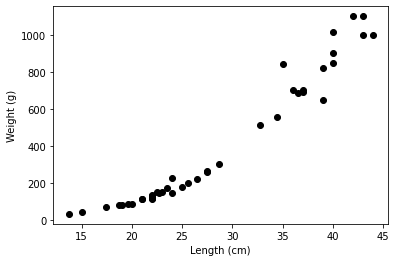

In [16]:
plt.scatter(X_train, y_train, color='black')

plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.show()

# Polynomial을 이용한 LinearRegression

In [17]:
# 선형 회귀 결과를 시각화할 때 사용하기 위해서
Xs = np.arange(14, 45, 0.001).reshape((-1, 1))  # predict() 메서드에서 사용할 수 있는 shape

In [22]:
def visualize_regression(estimator, X, y):
    Xs = np.arange(14, 45, 0.001).reshape((-1, 1))
    degrees = (1, 2, 5, 100)
    for d in degrees:
        # 훈련 모델: Polynomial -> Scale -> L.R.
        poly_features = PolynomialFeatures(degree=d, include_bias=False)
        std_scaler = StandardScaler()
        lin_reg = estimator
        model = Pipeline([('poly', poly_features),
                        ('scaler', std_scaler),
                        ('reg', lin_reg)])
        # 모델을 훈련 셋에 fitting(학습시킴)
        model.fit(X, y)
        # 회귀 훈련의 결과
        print(model['reg'].coef_)

        # 회귀의 결과를 시각화하기 위한 y값들
        ys = model.predict(Xs)
        # 시각화
        plt.plot(Xs, ys, label=f'degree={d}')

    # 훈련 데이터 시각화
    plt.scatter(X, y, color='black', alpha=0.5)

    plt.legend()
    plt.xlabel('Length (cm)')
    plt.ylabel('Weight (g)')
    plt.xlim((14, 45))
    plt.ylim((-200, 1400))
    plt.show()

[340.55381311]
[-188.16429447  532.30423546]
[ 1090.51349849 -4377.12096334  5960.80924384 -2038.47216236
  -298.04297802]
[ 2.00557630e+10 -2.58408022e+11  1.49532847e+12 -4.90418675e+12
  9.34291430e+12 -8.67392996e+12 -7.82611682e+11  7.69668003e+12
 -5.58109456e+09 -6.79558407e+12 -2.46010065e+12  4.99817517e+12
  5.20423172e+12 -1.63569143e+11 -5.04386991e+12 -4.58103039e+12
 -2.92727936e+11  3.58006339e+12  4.82124023e+12  2.56502444e+12
 -1.02653972e+12 -3.84050839e+12 -4.08225740e+12 -2.38407359e+12
  1.98148411e+11  2.61238310e+12  3.62406355e+12  3.27104682e+12
  1.54929950e+12 -4.44063972e+11 -2.07165132e+12 -3.00069992e+12
 -3.00183843e+12 -2.13789600e+12 -6.78418491e+11  7.14760716e+11
  2.02103482e+12  2.55576738e+12  2.52470076e+12  1.91395216e+12
  1.04869405e+12  8.39890755e+10 -9.16363136e+11 -1.73570552e+12
 -2.04897502e+12 -2.09658188e+12 -1.65299115e+12 -1.16987146e+12
 -4.25185309e+11  2.76530253e+11  9.12030793e+11  1.36269923e+12
  1.62030446e+12  1.62185850e+12

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


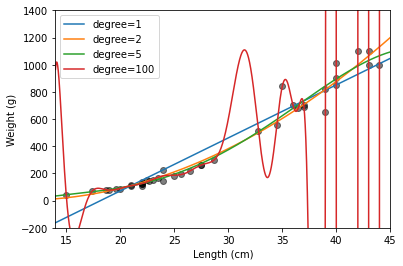

In [24]:
regressor = LinearRegression()  # 선형 회귀 모델 생성
visualize_regression(estimator=regressor, X=X_train, y=y_train)  # 함수 호출

## Ridge(l2) Regularization(규제) 효과

[332.63395699]
[ 90.58971122 249.48800198]
[71.46390274 95.36902828 90.24481144 64.15690222 24.69095831]
[ 5.68458773e+01  7.11425789e+01  7.19548031e+01  6.42812775e+01
  5.23489678e+01  3.91902142e+01  2.67131342e+01  1.59431315e+01
  7.28932355e+00  7.73385834e-01 -3.79884638e+00 -6.72086082e+00
 -8.31296552e+00 -8.88121060e+00 -8.69698510e+00 -7.98930587e+00
 -6.94436388e+00 -5.70885132e+00 -4.39495875e+00 -3.08582633e+00
 -1.84079404e+00 -7.00133384e-01  3.10859884e-01  1.17842459e+00
  1.89750069e+00  2.46943497e+00  2.90014981e+00  3.19870069e+00
  3.37615470e+00  3.44473059e+00  3.41714966e+00  3.30615492e+00
  3.12416328e+00  2.88302224e+00  2.59384748e+00  2.26692283e+00
  1.91164759e+00  1.53651914e+00  1.14914171e+00  7.56253695e-01
  3.63767984e-01 -2.31792990e-02 -4.00174914e-01 -7.63472115e-01
 -1.10993364e+00 -1.43697553e+00 -1.74251269e+00 -2.02490700e+00
 -2.28291835e+00 -2.51565892e+00 -2.72255076e+00 -2.90328676e+00
 -3.05779501e+00 -3.18620626e+00 -3.28882457e+00 -

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


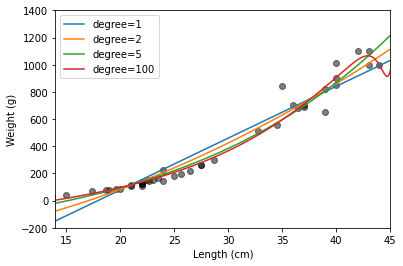

In [25]:
regressor = Ridge()
visualize_regression(regressor, X_train, y_train)

Ridge 규제는 고차항들의 계수를 작게 만들어서 곡선의 기울기 완만해지게 만들어 줌으써, 더 일반화가 잘 되는(테스트 셋에서 더 좋은 점수가 나오는) 모델을 만들어 줌.

## Lasso(l1) Regularization(규제)의 효과

[339.55381311]
[-37.56688954 381.72140363]
[  0.         169.86798493 175.39652371   0.          -0.        ]
[  0.          63.2765925  268.72581206  29.02636369   0.
   0.           0.           0.          -0.          -0.
  -0.          -0.          -0.          -0.          -0.
  -0.          -0.          -0.          -0.          -0.
  -0.          -0.          -0.          -0.          -0.
  -0.          -0.          -0.          -0.          -0.
  -0.          -0.          -0.          -0.          -0.
  -0.          -0.          -0.          -0.          -0.
  -0.          -0.          -0.          -0.          -0.
  -0.          -0.          -0.          -0.          -0.
  -0.          -0.          -0.          -0.          -6.77634564
  -6.07574687  -5.17017489  -4.29993019  -3.4658082   -2.66828008
  -1.90753532  -1.18352019  -0.49597256  -0.          -0.
  -0.          -0.          -0.          -0.          -0.
  -0.          -0.          -0.          -0.          -0.
  -0

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 761.342244306521, tolerance: 518.2793833333334
  positive)


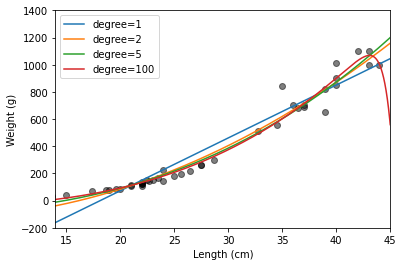

In [27]:
regressor = Lasso()
visualize_regression(regressor, X_train, y_train)

Lasso 규제는 중요하지 고차항의 계수들을 0으로 만들어 줌으로써, 곡선을 완만하게 만들어서 일반화 성능을 높여주는(테스트 셋을 더 잘 예측하는) 모델을 만들어 줌.

## ElasticNet Regularization